# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "weatherPy/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [71]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [83]:
# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q=" + city

# Get request
weather_response = requests.get(query_url)
weather_json = weather_response.json()

# Get the temperature from the response
print(f"The weather API responded with: {weather_json}.")

The weather API responded with: {'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}, {'id': 300, 'main': 'Drizzle', 'description': 'light intensity drizzle', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 284.15, 'feels_like': 283.21, 'temp_min': 284.15, 'temp_max': 284.15, 'pressure': 997, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 1, 'deg': 90}, 'rain': {'1h': 0.28}, 'clouds': {'all': 75}, 'dt': 1607294345, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1607241147, 'sunset': 1607302610}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}.


In [102]:
# DataFrame lists (according to example in starter file)
second_city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# Variables for counting list items
record = 0
group = 1

units = "imperial"
query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + item
print("Beginning Data Retrieval")
print("------------------------------")
# Loop through api to get data for each city in list created above
for item in cities:
    query_url = url + "appid=" + weather_api_key + "&units=" + units + "&q=" + item
    try:        
        response = requests.get(query_url).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if record > 40:
            time.sleep(1.0)
            record = 1
            group += 1
            second_city.append(item)
        else:
            record += 1
            second_city.append(item)
        print(f"Processing Record {record} of Group {group} | {item}")
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval
------------------------------
Processing Record 1 of Group 1 | yellowknife
Processing Record 2 of Group 1 | longyearbyen
Processing Record 3 of Group 1 | aldan
Processing Record 4 of Group 1 | ponta do sol
Processing Record 5 of Group 1 | georgetown
Processing Record 6 of Group 1 | barrow
Processing Record 7 of Group 1 | punta arenas
Processing Record 8 of Group 1 | meyzieu
Processing Record 9 of Group 1 | naziya
Processing Record 10 of Group 1 | nadvoitsy
Processing Record 11 of Group 1 | leningradskiy
Processing Record 12 of Group 1 | airai
Processing Record 13 of Group 1 | burnie
Processing Record 14 of Group 1 | dikson
Processing Record 15 of Group 1 | lianran
Processing Record 16 of Group 1 | bluff
Processing Record 17 of Group 1 | alta floresta
City not found. Skipping...
Processing Record 18 of Group 1 | kapaa
Processing Record 19 of Group 1 | qaanaaq
Processing Record 20 of Group 1 | ilulissat
Processing Record 21 of Group 1 | chuy
Processing Record 22

Processing Record 15 of Group 5 | krasnouralsk
Processing Record 16 of Group 5 | san quintin
Processing Record 17 of Group 5 | jacareacanga
Processing Record 18 of Group 5 | talnakh
Processing Record 19 of Group 5 | kaitangata
Processing Record 20 of Group 5 | sassandra
Processing Record 21 of Group 5 | fare
Processing Record 22 of Group 5 | puri
Processing Record 23 of Group 5 | syriam
Processing Record 24 of Group 5 | williston
Processing Record 25 of Group 5 | evensk
City not found. Skipping...
City not found. Skipping...
Processing Record 26 of Group 5 | baraya
Processing Record 27 of Group 5 | brae
Processing Record 28 of Group 5 | nuqui
Processing Record 29 of Group 5 | stranda
Processing Record 30 of Group 5 | ust-kut
Processing Record 31 of Group 5 | peniche
Processing Record 32 of Group 5 | dingle
Processing Record 33 of Group 5 | pisco
Processing Record 34 of Group 5 | omboue
Processing Record 35 of Group 5 | yar-sale
Processing Record 36 of Group 5 | tautira
Processing Recor

Processing Record 31 of Group 9 | christchurch
Processing Record 32 of Group 9 | shestakovo
Processing Record 33 of Group 9 | kieta
Processing Record 34 of Group 9 | sibu
Processing Record 35 of Group 9 | bure
Processing Record 36 of Group 9 | general roca
Processing Record 37 of Group 9 | sikonge
Processing Record 38 of Group 9 | tucupita
Processing Record 39 of Group 9 | north bend
Processing Record 40 of Group 9 | karratha
Processing Record 41 of Group 9 | aranos
Processing Record 1 of Group 10 | aklavik
Processing Record 2 of Group 10 | nenjiang
Processing Record 3 of Group 10 | kuito
Processing Record 4 of Group 10 | port-cartier
Processing Record 5 of Group 10 | barkhan
Processing Record 6 of Group 10 | kangaatsiaq
Processing Record 7 of Group 10 | kamsack
Processing Record 8 of Group 10 | motiong
Processing Record 9 of Group 10 | pallasovka
Processing Record 10 of Group 10 | paramonga
Processing Record 11 of Group 10 | hualmay
Processing Record 12 of Group 10 | sioux lookout
Pro

Processing Record 7 of Group 14 | mount isa
Processing Record 8 of Group 14 | fershampenuaz
Processing Record 9 of Group 14 | poronaysk
Processing Record 10 of Group 14 | byron bay
City not found. Skipping...
Processing Record 11 of Group 14 | gopalpur
Processing Record 12 of Group 14 | conakry
Processing Record 13 of Group 14 | itarema
Processing Record 14 of Group 14 | havelock
Processing Record 15 of Group 14 | gornyy
Processing Record 16 of Group 14 | tadine
City not found. Skipping...
Processing Record 17 of Group 14 | carballo
------------------------------
Data Retrieval Complete
------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [103]:
# Putting response info into dictionary for creating DataFrame
api_info = {"City":second_city, "Lat":lat, "Lng":lng, "Max Temp":max_temp, "Humidity":humidity,
            "Cloudiness":cloudiness, "Wind Speed":wind_speed, "Country":country, "Date":date}
weather_df = pd.DataFrame(api_info)
weather_df.to_csv(output_data_file)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,19.40,92,90,8.05,CA,1607302215
1,longyearbyen,78.22,15.64,28.40,86,90,19.46,SJ,1607302401
2,aldan,58.60,125.39,-0.69,91,100,12.41,RU,1607302401
3,ponta do sol,32.67,-17.10,59.00,82,40,5.82,PT,1607302401
4,georgetown,5.41,100.34,80.60,88,20,1.12,MY,1607302401


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [105]:
weather_df.drop(weather_df[weather_df["Humidity"] > 100].index, inplace = True) 
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,19.40,92,90,8.05,CA,1607302215
1,longyearbyen,78.22,15.64,28.40,86,90,19.46,SJ,1607302401
2,aldan,58.60,125.39,-0.69,91,100,12.41,RU,1607302401
3,ponta do sol,32.67,-17.10,59.00,82,40,5.82,PT,1607302401
4,georgetown,5.41,100.34,80.60,88,20,1.12,MY,1607302401
...,...,...,...,...,...,...,...,...,...
545,itarema,-2.92,-39.92,80.13,80,100,14.09,BR,1607302473
546,havelock,34.88,-76.90,45.00,87,1,2.28,US,1607302346
547,gornyy,55.12,83.91,1.60,94,99,11.18,RU,1607302473
548,tadine,-21.55,167.88,81.97,73,24,17.54,NC,1607302473


In [106]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_indexes = weather_df.index[weather_df["Humidity"] > 100].tolist()
print(high_humidity_indexes)

[]


In [107]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(weather_df[weather_df["Humidity"] > 100].index, inplace = False) 
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.46,-114.35,19.40,92,90,8.05,CA,1607302215
1,longyearbyen,78.22,15.64,28.40,86,90,19.46,SJ,1607302401
2,aldan,58.60,125.39,-0.69,91,100,12.41,RU,1607302401
3,ponta do sol,32.67,-17.10,59.00,82,40,5.82,PT,1607302401
4,georgetown,5.41,100.34,80.60,88,20,1.12,MY,1607302401


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

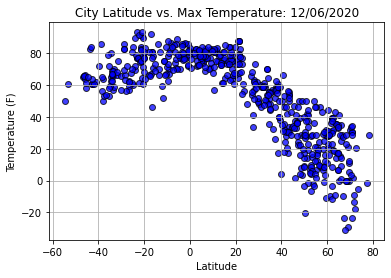

In [123]:
# Scatter plot for looking at latitude vs. temperature
plt.scatter(clean_city_data["Lat"], clean_city_data["Max Temp"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature: {time.strftime('%m/%d/%Y')}")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weatherPy/output_data/fig1.png")

## Latitude vs Temperature Explanation:
* Alphabet Soup

## Latitude vs. Humidity Plot

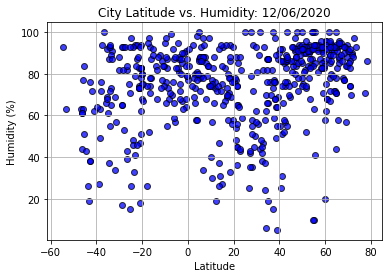

In [124]:
# Scatter plot for looking at latitude vs. humidity
plt.scatter(clean_city_data["Lat"], clean_city_data["Humidity"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity: {time.strftime('%m/%d/%Y')}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weatherPy/output_data/fig2.png")

## Latitude vs Humidity Explanation:
* Alphabet Soup

## Latitude vs. Cloudiness Plot

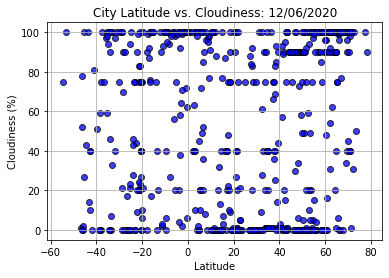

In [125]:
# Scatter plot for looking at latitude vs. cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Cloudiness"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness: {time.strftime('%m/%d/%Y')}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weatherPy/output_data/fig3.png")

## Latitude vs Cloudiness Explanation:
* Alphabet Soup

## Latitude vs. Wind Speed Plot

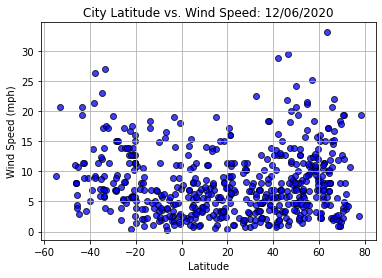

In [126]:
# Scatter plot for looking at latitude vs. cloudiness
plt.scatter(clean_city_data["Lat"], clean_city_data["Wind Speed"], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed: {time.strftime('%m/%d/%Y')}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("weatherPy/output_data/fig4.png")

## Latitude vs Wind Speed Explanation:
* Alphabet Soup

## Linear Regression

In [166]:
# Creating dataframes for north and south hemisphere
north_df = clean_city_data.loc[clean_city_data["Lat"] >= 0]
south_df = clean_city_data.loc[clean_city_data["Lat"] < 0]

# x_values = housing_data['RM']
# y_values = housing_data['MEDV']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($1000)')
# plt.show()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,punta arenas,-53.15,-70.92,60.80,63,100,20.80,CL,1607302402
11,airai,-8.93,125.41,70.39,87,100,1.90,TL,1607301813
12,burnie,-41.07,145.92,62.01,62,81,8.99,AU,1607302403
15,bluff,-46.60,168.33,64.99,63,1,11.01,NZ,1607302088
16,alta floresta,-9.88,-56.09,71.11,95,100,1.70,BR,1607301885


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7456183765886799


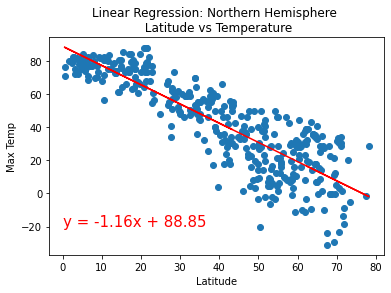

In [172]:
nlatx = north_df["Lat"]
nmax_tempy = north_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(nlatx, nmax_tempy)
regress_values = latx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(nlatx,nmax_tempy)
plt.plot(nlatx,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Linear Regression: Northern Hemisphere \n Latitude vs Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.24513008221321736


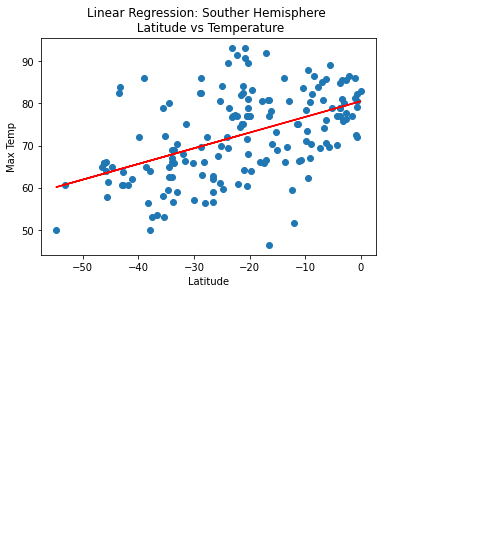

In [174]:
slatx = south_df["Lat"]
smax_tempy = south_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(slatx, smax_tempy)
regress_values = slatx * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(slatx,smax_tempy)
plt.plot(slatx,regress_values,"r-")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Linear Regression: Souther Hemisphere \n Latitude vs Temperature")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


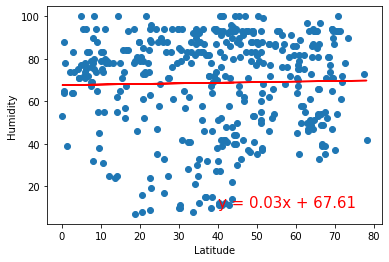

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


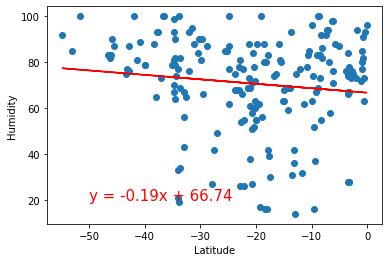

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


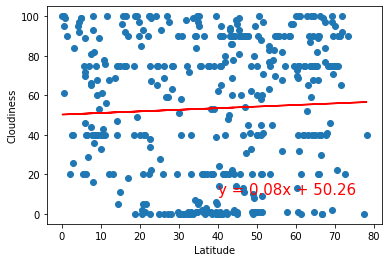

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


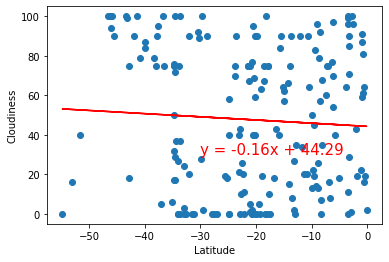

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


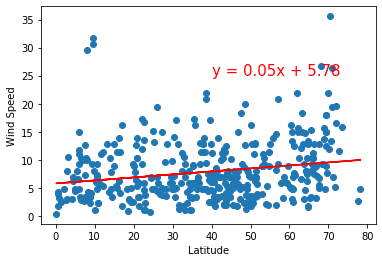

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


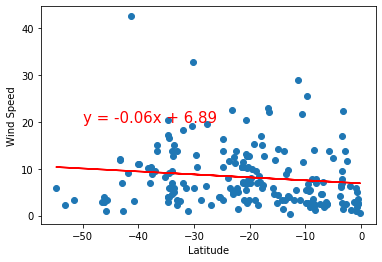